In [1072]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1073]:
data = pd.read_csv('insurance_data.csv')
data

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [1074]:
X = data['age'].values
Y = data['bought_insurance'].values

In [1075]:
mean_X = np.mean(X)
mean_Y = np.mean(Y)

mean_X,mean_Y

(39.666666666666664, 0.5185185185185185)

In [1076]:
num,den = 0,0

for x,y in zip(X,Y):
    num += (x - mean_X) * (y - mean_Y)
    den += (x - mean_X) ** 2

slope = num / den
slope

0.023683938359706284

In [1077]:
y_intercept = mean_Y - slope * mean_X
y_intercept

-0.42094436974983074

In [1078]:
y_predicted = []

for x in X:
    y_predicted.append(slope * x + y_intercept)

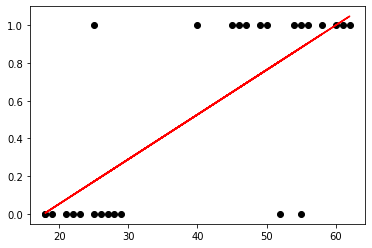

In [1079]:
plt.scatter(X,Y,color="#000")
plt.plot(X,y_predicted,color="#f00")

In [1080]:
#R2 score
num,den = 0,0

for y,y_pred in zip(Y,y_predicted):
    num += (y_pred - mean_Y) ** 2
    den += (y - mean_Y) ** 2

r2 = num / den
r2

0.5364021643885124

In [1081]:
def sigmoid(x,der=False):
    if der == True:
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))


def comp(a):
    return a[0]

In [1082]:
new_data = []
new_data.append(data['age'].values)
new_data.append(data['bought_insurance'].values)

new_data = np.array(new_data).T
new_data = list(new_data)
new_data.sort(key=comp)

new_data = np.array(new_data)
X = list(new_data.T[0])
Y = list(new_data.T[1])

In [1083]:
input = np.array([X]).T
output = np.array([Y]).T

weights = 2 * np.random.random((1,1)) - 1
bias = 2 * np.random.random((1,1)) - 1

In [1084]:
predicted = []
learning_rate = 0.001

for epoch in range(10000):
    weighted_sum = np.dot(input,weights) + bias
    curr_output = sigmoid(weighted_sum)

    error = output - curr_output
    adjust = error * sigmoid(curr_output,True)

    weights += np.dot(input.T,adjust) * learning_rate
    bias += np.sum(adjust,axis=0) * learning_rate

    predicted = curr_output

predicted

array([[0.15485218],
       [0.15485218],
       [0.16751337],
       [0.19529244],
       [0.21043686],
       [0.22642523],
       [0.26091189],
       [0.26091189],
       [0.27937826],
       [0.29862352],
       [0.31860837],
       [0.3392837 ],
       [0.59002403],
       [0.6968828 ],
       [0.71630053],
       [0.73494746],
       [0.76981097],
       [0.78599159],
       [0.81582357],
       [0.84233127],
       [0.85437853],
       [0.85437853],
       [0.8656521 ],
       [0.88599041],
       [0.9035927 ],
       [0.91145113],
       [0.91872662]])

In [1085]:
#accuracy
logistic_y = list(np.array(predicted).T[0])

acc = np.sum((output.T[0] - np.array(predicted).T[0]) ** 2) / len(X)
print(1-acc)

0.8809719017979079


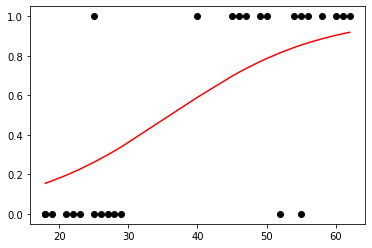

In [1086]:
plt.scatter(X,Y,color="#000")
plt.plot(X,logistic_y,color="#f00")